# Model Development

### Tool: Pycaret

## Summary

a.  5% of the data were made unseen to the model

b. The remaining 95% data were splited into training and test set on the ratio 70:30 respectively
    
c. The training was based on 5 folds CV

d. Recall was used as the metric to evaluate models and randome forest was the best model.

e. I tested and tuned the selected model on the 30% test data but the tuned was less better

f.  Merged dataset was made from the training and test set in step b above to create a final random forest model.

e. I tested the final model on the unseen data in step 1 above to determine its performance

# Feature Engineering Methods Used

### 1. Normalization: 
Normalization / Scaling (often used interchangeably with standardization) is used to transform the actual values of numeric variables in a way that provides helpful properties for machine learning. Many algorithms such as Logistic Regression, Support Vector Machine, K Nearest Neighbors and Naive Bayes assume that all features are centered around zero and have variances that are at at the same level of order. If a particular feature in a dataset has a variance that is larger in order of magnitude than other features, the model may not understand all features correctly and could perform poorly..

### 2. Transformation:
While normalization transforms the range of data to remove the impact of magnitude in variance, transformation is a more radical technique as it changes the shape of the distribution so that transformed data can be represented by a normal or approximate normal distirbution. In general, you should transform the data if using algorithms that assume normality or a gaussian distribution. Examples of such models are Logistic Regression, Linear Discriminant Analysis (LDA) and Gaussian Naive Bayes

### 3. Multi-collinearity: 
Multi-collinearity is a state of very high intercorrelations or inter-associations among the independent features in the dataset. It is a type of disturbance in the data that is not handled well by machine learning models (mostly linear algorithms). Multi-collinearity may reduce overall coefficient of the model and cause unpredictable variance. This will lead to overfitting where the model may do great on a known training set but will fail with an unknown testing set.

### 4. Fix Imbalance: 
From our data, only 10% of the clients churned hence we have a highly imbalanced data and we fix this using SMOTE technique

## My Findings
From the random forest model, i discovered churn is not due to price sensitivity alone. In fact, price does not work alone, it is affected by another variable which causes customers to churn. Similar to other variables that influences churn, they don't work alone, they are influenced by other variables.

Hence, introducing a 20% discount strategy for customers with high propensity to churn will not dramatically lower churn rate.

## Recommendation

Atention should be the best customers as revealed and allocate more resources to retaining them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import*

In [2]:
%matplotlib inline 
sns.set(color_codes=True)
pd.set_option('display.max_columns', 100)

In [3]:
dataset = pd.read_csv('processed_data.csv')

data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

dates = ['id','date_activ', 'date_end','date_modif_prod','date_renewal','price_date']
data = data.drop(dates, axis = 1)
data_unseen = data_unseen.drop(dates, axis=1)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (149753, 27)
Unseen Data For Predictions: (7882, 27)


In [4]:
exp_name = setup(data, target = "churn", session_id=123, normalize = True, transformation = True, multicollinearity_threshold = 0.95, feature_selection = True,   fix_imbalance = True)

,Description,Value
0,Session id,123
1,Target,churn
2,Target type,Binary
3,Original data shape,"(149753, 27)"
4,Transformed data shape,"(232016, 6)"
5,Transformed train set shape,"(187090, 6)"
6,Transformed test set shape,"(44926, 6)"
7,Ordinal features,1
8,Numeric features,23
9,Categorical features,3


## Comparing Models

In [5]:
select_model = compare_models(exclude = ['knn', 'gbc', 'xgboost'], sort = 'Recall', fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9975,1.0000,1.0000,0.9770,0.9884,0.9869,0.9870,21.4160
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,0.9999,1.0000,1.0000,1.0000,5.7660
svm,SVM - Linear Kernel,0.9932,0.0000,1.0000,0.9409,0.9695,0.9657,0.9663,6.4100
rf,Random Forest Classifier,1.0000,1.0000,1.0000,0.9999,1.0000,1.0000,1.0000,6.9160
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,0.9999,1.0000,1.0000,1.0000,6.3320
et,Extra Trees Classifier,1.0000,1.0000,1.0000,0.9999,1.0000,1.0000,1.0000,5.3380
lightgbm,Light Gradient Boosting Machine,0.9998,1.0000,1.0000,0.9981,0.9990,0.9989,0.9989,5.1080
qda,Quadratic Discriminant Analysis,0.9947,1.0000,0.9840,0.9693,0.9759,0.9729,0.9734,5.2460
nb,Naive Bayes,0.9973,1.0000,0.9750,1.0000,0.9873,0.9858,0.9859,5.8540
ridge,Ridge Classifier,0.9973,0.0000,0.9750,1.0000,0.9873,0.9858,0.9859,5.1380


Processing:   0%|          | 0/49 [00:00<?, ?it/s]

In [6]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9999,1.0000,1.0000,0.9991,0.9996,0.9995,0.9995
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tuning the random forest model

In [7]:
tuned_rf = tune_model(rf, fold = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,0.9998,0.9999,0.9999,0.9999
1,1.0000,1.0000,0.9996,1.0000,0.9998,0.9998,0.9998
Mean,1.0000,1.0000,0.9998,0.9999,0.9999,0.9999,0.9999
Std,0.0000,0.0000,0.0002,0.0001,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Evaluate the random forest model

In [8]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### AUC Plot

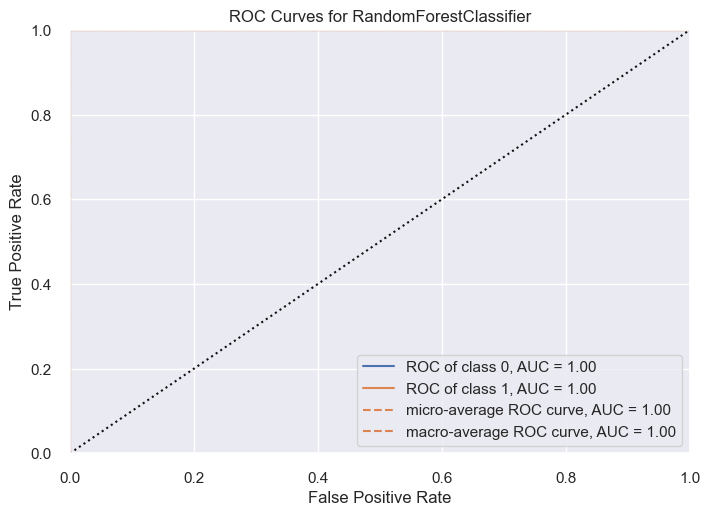

In [12]:
plot_model(rf, plot = 'auc')

#### Precision/Recall Curve

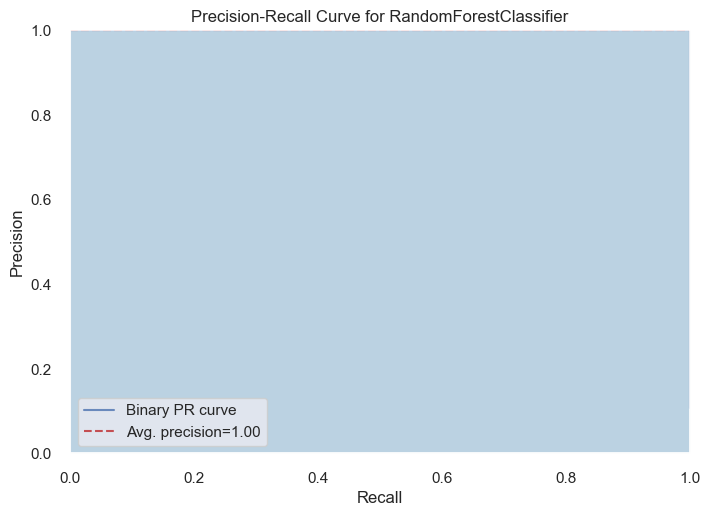

In [13]:
plot_model(rf, plot = 'pr')

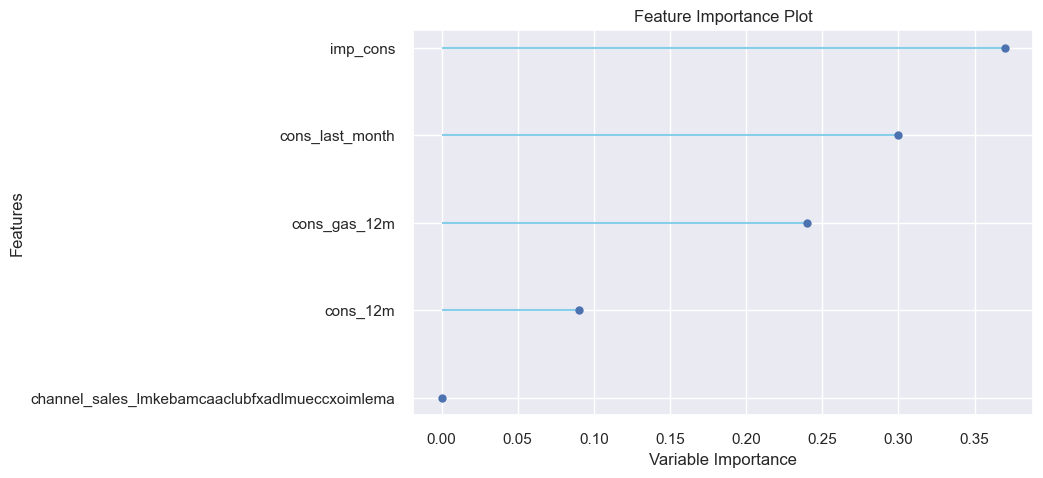

In [14]:
plot_model(rf, plot='feature')

#### Predict on test / hold-out Sample
Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. As stated earlier, 30% of the data has been separated out as test/hold-out sample. All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. Now, using our final trained model stored in the tuned_rf variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results

In [15]:
predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,0.9996,0.9998,0.9998,0.9998


,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,pow_max,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn,prediction_label,prediction_score
26241,MISSING,4352,0,0,396.420013,0,0.0,15.750000,0.115237,0.000000,...,10.530000,0.125254,0.000000,0.000000,40.728886,0.000000,0.000000,0,0,1.0
114175,foosdfpfkusacimwkcsosbicdxkicaua,24903,0,1955,1742.790039,997,0.0,118.239998,0.145677,0.096984,...,15.500000,0.149555,0.099349,0.070232,44.266930,24.339579,16.226383,0,0,1.0
73197,usilxuppasemubllopkaafesmlibmsdf,272184,18055,24169,4666.109863,4204,0.0,143.460007,0.164637,0.100572,...,30.000000,0.167989,0.105698,0.075004,44.444710,24.437330,16.291555,1,1,1.0
95559,usilxuppasemubllopkaafesmlibmsdf,881406,68125,76055,6020.500000,5855,0.0,145.539993,0.165794,0.101750,...,40.000000,0.170590,0.107163,0.076257,44.444710,24.437330,16.291555,1,1,1.0
77100,usilxuppasemubllopkaafesmlibmsdf,598235,40464,53135,5400.500000,5066,0.0,144.679993,0.165793,0.101397,...,34.639999,0.169629,0.106863,0.075677,44.444710,24.437330,16.291555,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46242,foosdfpfkusacimwkcsosbicdxkicaua,7431,0,0,637.090027,0,0.0,16.469999,0.116910,0.000000,...,13.200000,0.128713,0.000000,0.000000,40.728886,0.000000,0.000000,0,0,1.0
42863,foosdfpfkusacimwkcsosbicdxkicaua,30191,0,2450,1987.910034,1255,0.0,129.250000,0.145711,0.098261,...,16.500000,0.150495,0.100491,0.071536,44.266930,24.339581,16.226383,0,0,1.0
11366,foosdfpfkusacimwkcsosbicdxkicaua,18878,0,1303,1395.540039,624,0.0,24.440001,0.144631,0.087899,...,14.800000,0.147983,0.087890,0.000000,44.266930,0.000000,0.000000,0,0,1.0
110297,ewpakwlliwisiwduibdlfmalxowmwpci,7127,0,0,612.559998,0,0.0,16.410000,0.116910,0.000000,...,13.200000,0.128069,0.000000,0.000000,40.728886,0.000000,0.000000,0,0,1.0


The accuracy on test/hold-out set is. 0.99. This is not a significant difference. If there is a large variation between the test/hold-out and CV results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. In this case, we will move forward with finalizing the model and predicting on unseen data (the 5% that we had separated in the beginning and never exposed to training)

#### Finalize Model for Deployment
Model finalization is the last step in the experiment. I started the machine learning workflow in with setup(), followed by comparing all models and shortlisting a few candidate models (based on recall).

This workflow will eventually lead to selecting random forest as the best model for use in making predictions on new and unseen data.

The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [16]:
final_rf = finalize_model(rf)

### Predict on unseen data

In [17]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,pow_max,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn,prediction_label,prediction_score
0,MISSING,2533,0,0,231.479996,0,0.0,10.91,0.114658,0.0,...,10.392,0.119326,0.0,0.0,40.565968,0.0,0.0,0,0,1.0
1,MISSING,2536,0,0,231.970001,0,0.0,10.92,0.114658,0.0,...,10.392,0.119326,0.0,0.0,40.565968,0.0,0.0,0,0,1.0
2,MISSING,2538,0,0,232.289993,0,0.0,10.97,0.114658,0.0,...,10.392,0.119327,0.0,0.0,40.565968,0.0,0.0,0,0,1.0
3,MISSING,2545,0,0,232.800003,0,0.0,11.05,0.114658,0.0,...,10.392,0.119327,0.0,0.0,40.565968,0.0,0.0,0,0,1.0
4,MISSING,2547,0,0,232.809998,0,0.0,11.05,0.114658,0.0,...,10.392,0.119327,0.0,0.0,40.565968,0.0,0.0,0,0,1.0


In [18]:
save_model(final_rf,'Final RF Model 25Dec2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Hp\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['cons_12m', 'cons_gas_12m',
                                              'cons_last_month',
                                              'forecast_cons_12m',
                                              'forecast_cons_year',
                                              'forecast_discount_energy',
                                              'forecast_meter_rent_12m',
                                              'forecast_price_energy_off_peak',
                                              'forecast_price_energy_peak',
                                              'forec...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth

In [19]:
final_rf

Pipeline(memory=FastMemory(location=C:\Users\Hp\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['cons_12m', 'cons_gas_12m',
                                             'cons_last_month',
                                             'forecast_cons_12m',
                                             'forecast_cons_year',
                                             'forecast_discount_energy',
                                             'forecast_meter_rent_12m',
                                             'forecast_price_energy_off_peak',
                                             'forecast_price_energy_peak',
                                             'forec...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [20]:
data_predictions = predict_model(final_rf, data = data)
data_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,0.9996,0.9998,0.9998,0.9998


,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,pow_max,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn,prediction_label,prediction_score
0,foosdfpfkusacimwkcsosbicdxkicaua,8760,0,145,741.890015,0,0.0,16.809999,0.120372,0.000000,...,13.200,0.131032,0.000000,0.000000,41.063969,0.00000,0.000000,0,0,1.0
1,foosdfpfkusacimwkcsosbicdxkicaua,16358,0,1029,1249.890015,464,0.0,19.610001,0.144038,0.086380,...,13.856,0.147600,0.085725,0.000000,44.266930,0.00000,0.000000,0,0,1.0
2,foosdfpfkusacimwkcsosbicdxkicaua,10423,0,365,858.229980,0,0.0,17.670000,0.141434,0.000000,...,13.200,0.144065,0.000000,0.000000,44.266930,0.00000,0.000000,0,0,1.0
3,usilxuppasemubllopkaafesmlibmsdf,904954,75074,82136,6125.979980,5968,0.0,145.720001,0.166178,0.101750,...,41.500,0.170590,0.107163,0.076311,44.444710,24.43733,16.291555,1,1,1.0
4,usilxuppasemubllopkaafesmlibmsdf,334821,22485,31128,4855.799805,4464,0.0,143.880005,0.164637,0.100572,...,31.500,0.168185,0.105842,0.075096,44.444710,24.43733,16.291555,1,1,1.0


In [21]:
data_predictions.to_csv('data_predictions.csv', index = False)